In [1]:
%matplotlib widget
import sys
sys.path.append("..")

import skimage
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
from src.pyvsnr import vsnr2d
from src.pyvsnr.utils import stripes_addition, curtains_addition
from utils import print_psnr

### 4 images, same noise

#### Preparing Images

In [2]:
# Load the images
img1 = skimage.data.moon()
img2 = skimage.data.camera()
img3 = rgb2gray(skimage.data.astronaut())
img4 = rgb2gray(skimage.data.immunohistochemistry())

imgs_src = np.array([img1, img2, img3, img4])
imgs_noisy = np.array([curtains_addition(img) for img in imgs_src])

#### Plotting

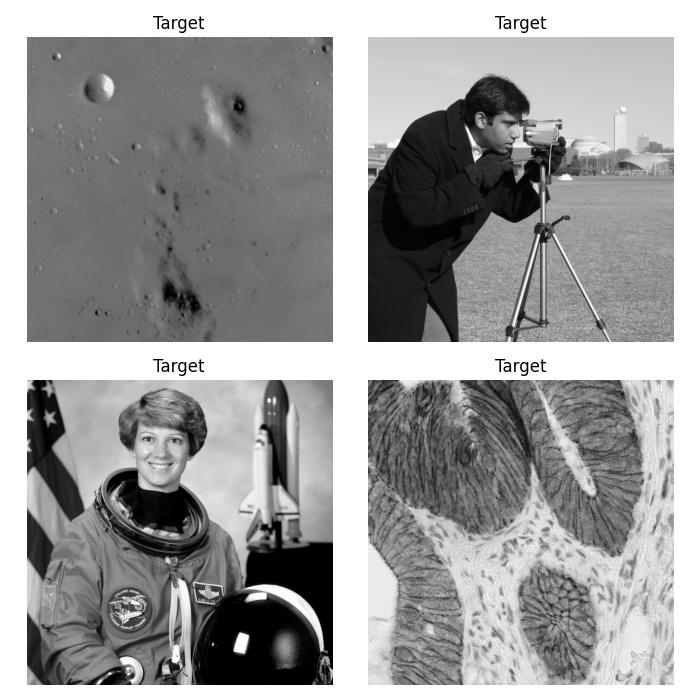

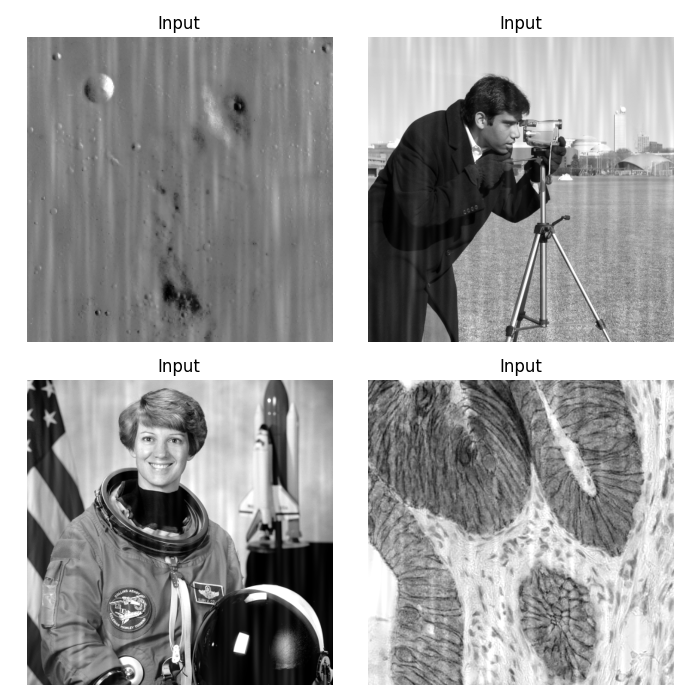

In [3]:
# Clean, target
fig, axs = plt.subplots(2, 2, figsize=(7,7), tight_layout=True)
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs_src[i], cmap='gray')
    ax.set_title(f"Target")
    ax.axis('off')
plt.show()

# Noisy, input
fig, axs = plt.subplots(2, 2, figsize=(7,7), tight_layout=True)
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs_noisy[i], cmap='gray')
    ax.set_title(f"Input")
    ax.axis('off')
plt.show()

#### Removing noise from images

/home/kp276129/Documents/pyvsnr/tests/../src/pyvsnr/vsnr2d_cuda.py:83: UserWarning: CUDA algorithm doesn't support batch processing, processing images one by one. Consider using algo='cupy'
  warnings.warn("CUDA algorithm doesn't support batch processing,\


PSNR Image 1 :
PSNR noisy image: -22.41dB
PSNR CUDA corrected image: -14.97dB
PSNR Python corrected image: -14.97dB
PSNR Image 2 :
PSNR noisy image: -22.28dB
PSNR CUDA corrected image: -23.33dB
PSNR Python corrected image: -23.33dB
PSNR Image 3 :
PSNR noisy image: 25.71dB
PSNR CUDA corrected image: 21.5dB
PSNR Python corrected image: 21.5dB
PSNR Image 4 :
PSNR noisy image: 25.59dB
PSNR CUDA corrected image: 24.36dB
PSNR Python corrected image: 24.36dB


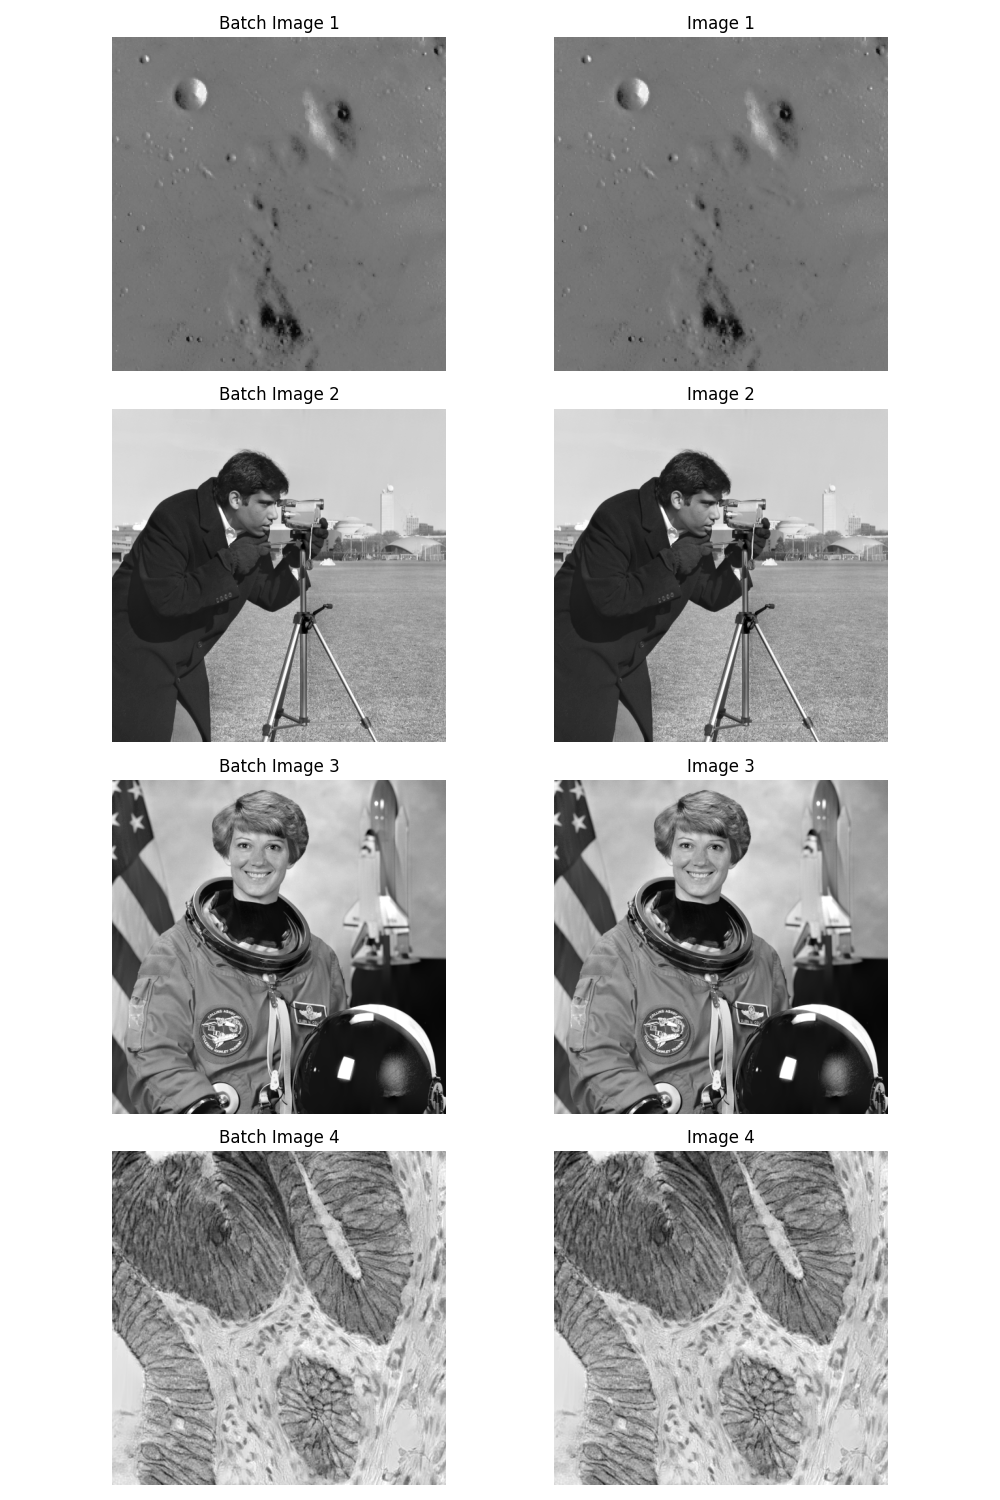

In [4]:
# Create a list to store the results
filters = [{'name':'Gabor', 'noise_level':20, 'sigma':(3,40), 'theta':0}]
imgs_batch = vsnr2d(imgs_noisy, filters, algo="cupy")
imgs = vsnr2d(imgs_noisy, filters, algo="cuda")

# Plot each image
fig, axs = plt.subplots(4, 2, figsize=(10,15), tight_layout=True)

for i in range(4):
    print(f"PSNR Image {i+1} :")
    print_psnr(imgs_src[i], imgs_noisy[i], imgs_batch[i], imgs[i], data_range=1.0)
    # Plot the imgs_batch images on the left
    axs[i, 0].imshow(imgs_batch[i], cmap='gray')
    axs[i, 0].set_title(f"Batch Image {i+1}")
    axs[i, 0].axis('off')

    # Plot the imgs images on the right
    axs[i, 1].imshow(imgs[i], cmap='gray')
    axs[i, 1].set_title(f"Image {i+1}")
    axs[i, 1].axis('off')

plt.show()

### 4 Images, same noise in different regions

#### Load the images

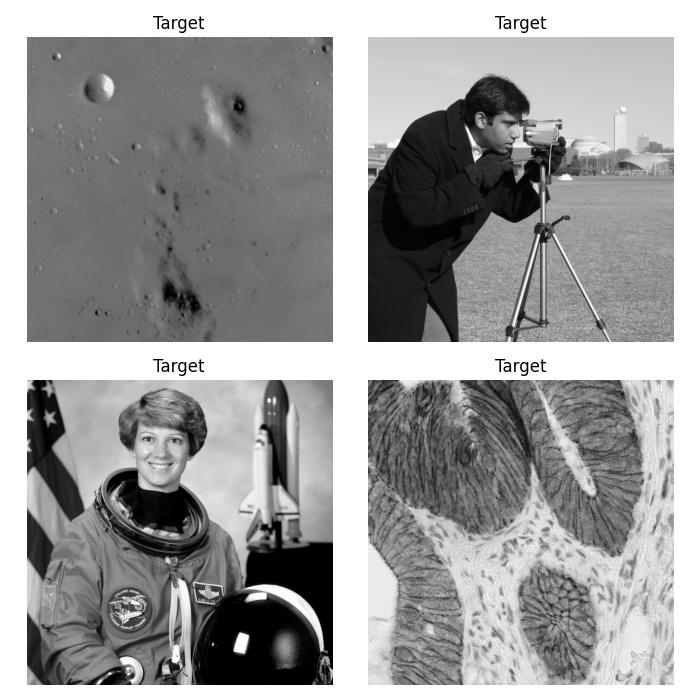

In [5]:
# Load the images
img1 = skimage.data.moon()
img2 = skimage.data.camera()
img3 = rgb2gray(skimage.data.astronaut())
img4 = rgb2gray(skimage.data.immunohistochemistry())

# Normalize the images
img1 = img1 / 255
img2 = img2 / 255
img3 = img3 / 255
img4 = img4 / 255

# Store the images in a list
imgs = np.array([img1, img2, img3, img4])

# Plot the images
fig, axs = plt.subplots(2, 2, figsize=(7,7), tight_layout=True)
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(f"Target")
    ax.axis('off')
plt.show()

#### Adding noise to images

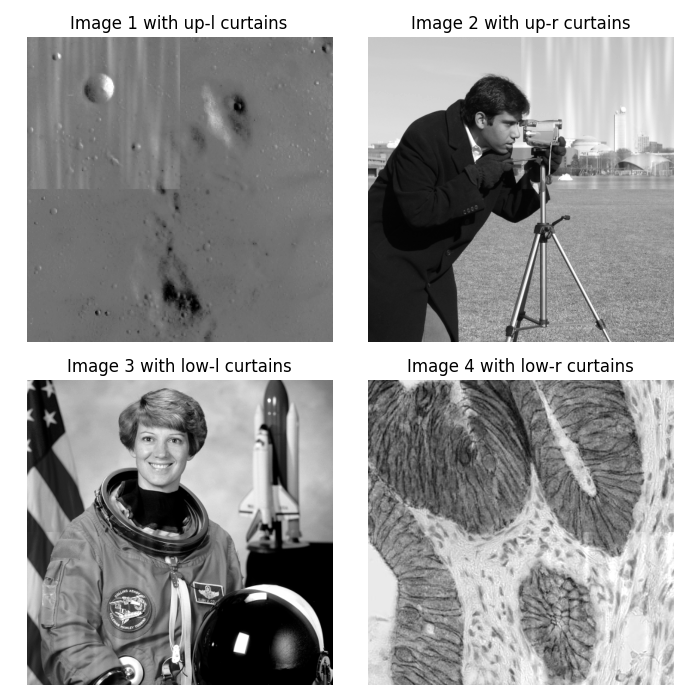

In [6]:
positions = ['up-l', 'up-r', 'low-l', 'low-r']

# Apply the curtains_addition function to each image with a different position
for i in range(4):
    imgs[i] = curtains_addition(imgs[i], position=positions[i])

# Plot the images
fig, axs = plt.subplots(2, 2, figsize=(7,7), tight_layout=True)
for i, ax in enumerate(axs.flat):
    ax.imshow(imgs[i], cmap='gray')
    ax.set_title(f"Image {i+1} with {positions[i]} curtains")
    ax.axis('off')
plt.show()

#### Removing noise from images

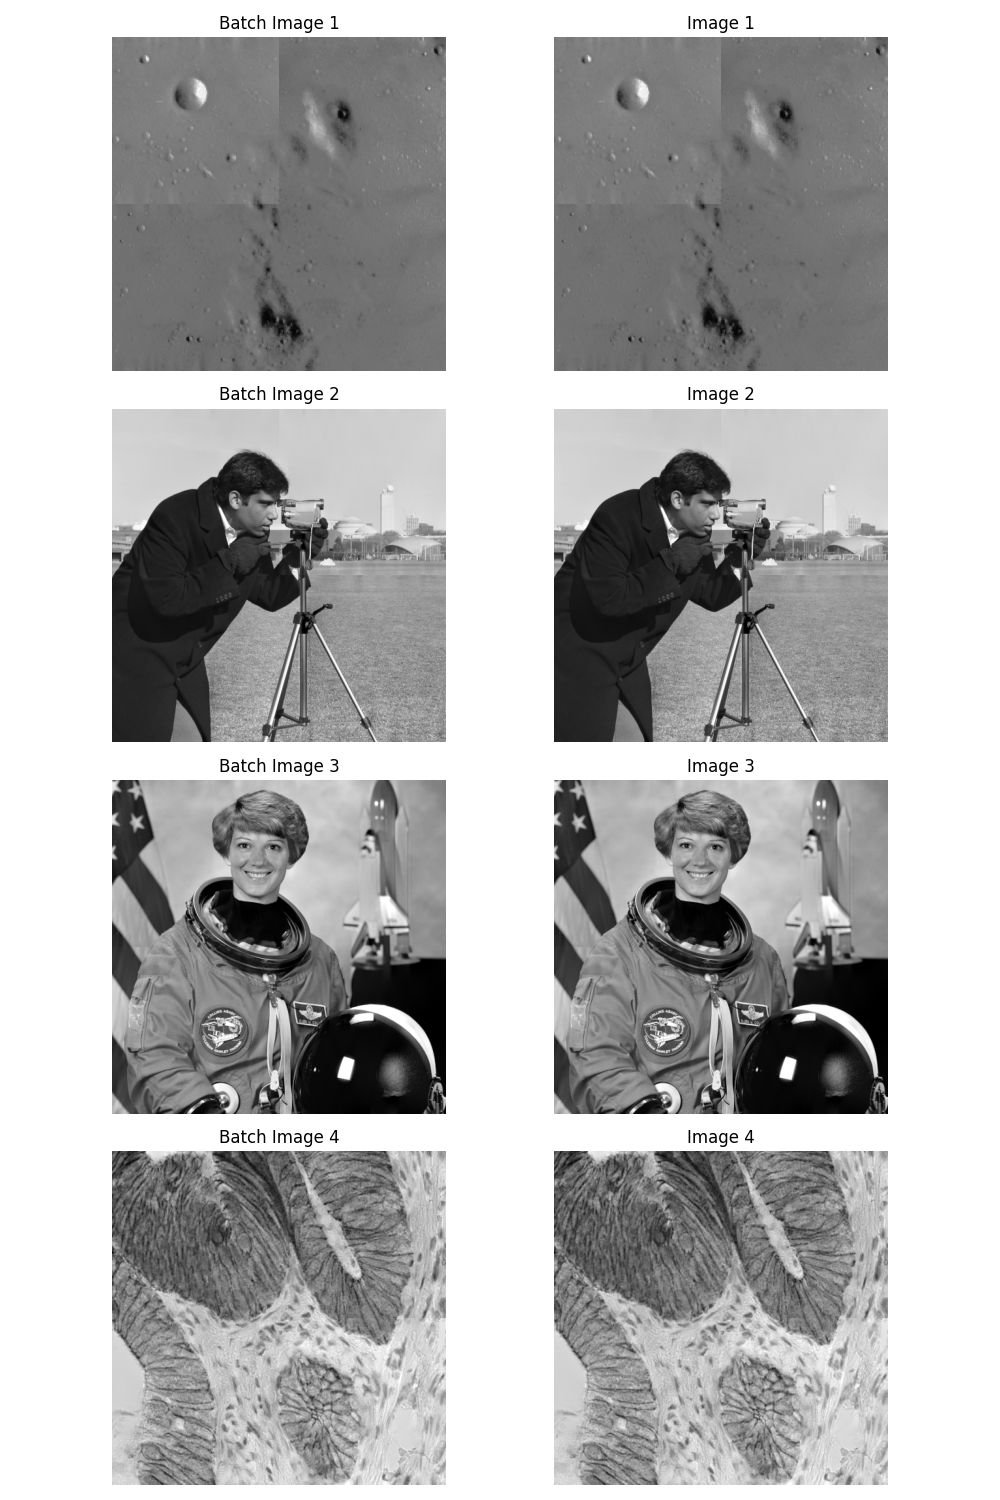

In [7]:
# Create a list to store the results
filters = [{'name':'Gabor', 'noise_level':20, 'sigma':(3,40), 'theta':0}]
imgs_batch = vsnr2d(imgs, filters, algo="cupy")
imgs = vsnr2d(imgs, filters, algo="cuda")

# Plot each image
fig, axs = plt.subplots(4, 2, figsize=(10,15), tight_layout=True)

for i in range(4):
    # Plot the imgs_batch images on the left
    axs[i, 0].imshow(imgs_batch[i], cmap='gray')
    axs[i, 0].set_title(f"Batch Image {i+1}")
    axs[i, 0].axis('off')

    # Plot the imgs images on the right
    axs[i, 1].imshow(imgs[i], cmap='gray')
    axs[i, 1].set_title(f"Image {i+1}")
    axs[i, 1].axis('off')

plt.show()